## **Домашнее задание 4**

Выполненную работу (желательно просто **ссылку на репозиторий** с работой на гитхабе) нужно прислать Даше П. (daschapopowa@gmail.com) и Даше Р. (daria.ryzhova@mail.ru) **до 23:59 6 июня**. По уважительной причине дедлайн можно перенести в индивидуальном порядке. Для этого напишите нам, и мы с вами обо всем договоримся.

1. *\[2 балла\]*

Напишите код для буквального слушающего и для прагматического слушающего. [Промпт](https://github.com/dashapopova/CompSemantics/blob/main/HWs/hw5_prompt.ipynb), в котором отмечены кусочки, которые надо вставить. Если Вы пропускаете этот пункт, в пунктах 2 и 3 вычисления можно проводить вручную.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class RSA:
    """Implementation of the core Rational Speech Acts model.

    Parameters
    ----------
    lexicon : `np.array` or `pd.DataFrame`
        Messages along the rows, states along the columns.
    prior : array-like
        Same length as the number of colums in `lexicon`.
    costs : array-like
        Same length as the number of rows in `lexicon`.
    alpha : float
        Default: 1.0
    """
    def __init__(self, lexicon, prior, costs, alpha=1.0):
        self.lexicon = lexicon
        self.prior = np.array(prior)
        self.costs = np.array(costs)
        self.alpha = alpha

    def literal_listener(self):
        """Literal listener predictions, which corresponds intuitively
        to truth conditions with priors.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to messages, the columns to states.

        """ 
        return rownorm(self.lexicon * self.prior)

    def speaker(self):
        """Returns a matrix of pragmatic speaker predictions.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to states, the columns to states.
        """
        lit = self.literal_listener().T
        utilities = self.alpha * (safelog(lit) + self.costs)
        return rownorm(np.exp(utilities))

    def listener(self):
        """Returns a matrix of pragmatic listener predictions.

        Returns
        -------
        np.array or pd.DataFrame, depending on `self.lexicon`.
        The rows correspond to messages, the columns to states.
        """
        lis_2 = self.speaker().T
        return rownorm(lis_2 * self.prior)


def rownorm(mat):
    """Row normalization of np.array or pd.DataFrame"""
    return (mat.T / mat.sum(axis=1)).T


def safelog(vals):
    """Silence distracting warnings about log(0)."""
    with np.errstate(divide='ignore'):
        return np.log(vals)

if __name__ == '__main__':
    """Example from the class slides"""

    from IPython.display import display


    def display_reference_game(mod):
        d = mod.lexicon.copy()
        d['costs'] = mod.costs
        d.loc['prior'] = list(mod.prior) + [""]
        d.loc['alpha'] = [mod.alpha] + [" "] * mod.lexicon.shape[1]
        display(d)

2. *\[2 балла\]*

Референциальная игра:

Три объекта `(r1, r2, r3)`

|        | r1         | r2  | r3 |
| ------------- |-------------| -----|------|
| `'шляпа'`    | 1 | 1 | 0 |
| `'очки'`     | 0     |   0 | 1|
| `'усы'` | 0      |    1 | 0|

Исходная вероятность `(P(r), prior)`

|        | P(r)|
| ------------- |-------------|
| r1    | 1/3 | 
| r2     | 1/3     |  
| r3 | 1/3      |   

Цена высказывания `(C(u), cost)`

|        | C(u)|
| ------------- |-------------|
| `'шляпа'`   | 0 | 
| `'очки'`     | 0     |  
| `'усы'` | 0      |   

Если принять, что `alpha = 1`, то распределение вероятностей для прагматического слушающего такое:

|        | r1         | r2  | r3 |
| ------------- |-------------| -----|------|
| `'шляпа'`    | 0.75 | 0.25 | 0 |
| `'очки'`     | 0     |   0 | 1|
| `'усы'` | 0      |    1 | 0|

- 2.1. можно ли вывести скалярную импликатуру из таблицы прагматического слушающего? обоснуйте свой ответ

- 2.2. что изменится, с точки зрения вычисления импликатуры, если поменять исходные вероятности на `P(r1) = 0.1`, `P(r2) = P(r3) = 0.45`? Приведите соответствующую таблицу распределения вероятностей для прагматического слушающего и прокомментируйте её. При расчетах, можно использовать код из пункта 1.

**ОТВЕТ 2.1:**

Мы можем вывести ее для первой строки (выражения `'шляпа'`). Так как для ситуации `r3` вероятность равна `0`, а для ситуаций `r1` и `r2` - `0.75` и `0.25` соответственно. Так, ненулевые вероятности не равны и не близки к равным.

При этом мы не можем ничего аналогичного вывести про строки с выражениями `'очки'` и `'усы'`, так как в каждом ряду всего одна `1` (то есть только одна ситуация: `r3` или `r2` соответственно, - им соответствует).

In [14]:
msgs = ['шляпа', 'очки', 'усы']
states = ['r1', 'r2', 'r3']
lex = pd.DataFrame([
    [1.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 1.0, 0.0],], index=msgs, columns=states)

basic_mod = RSA(lexicon=lex, prior=[0.1, 0.45, 0.45], costs=[0.0, 0.0, 0.0])

print("\nPragmatic listener")
display(basic_mod.listener())


Pragmatic listener


,r1,r2,r3
шляпа,0.330579,0.669421,0.0
очки,0.000000,0.000000,1.0
усы,0.000000,1.000000,0.0


**ОТВЕТ 2.2:**

Ничего не поменяется особо, кроме распределения верятностей для ситуаций `r1` и `r2` у выражения `'шляпа'`. Однако, хоть они и стали ближе (`0.75` и `0.25` → `~0.33` и `~0.67` соответственно), но все же не достаточно для того, чтобы скалярную импликатуру нельзя было бы вывести.

При этом мы все еще не можем ничего аналогичного вывести про строки с выражениями `'очки'` и `'усы'`.

3. *\[4 балла\]*

Рассмотрите референциальные игры с тремя объектами и с тремя высказываниями, где можно вычислить две скалярные импликатуры: 

- 3.1. приведите несколько вариантов таких игр (можно использовать те, которые были в эксперименте в конце занятия 16 мая)

- 3.2. последовательно проанализируйте, как варьирование параметров цены высказывания, исходной вероятности выбора объекта, оптимальности альфа влияет на вычисление скалярных импликатур в таких играх

При выполнении этого пункта можно использовать код из пункта 1.

**ОТВЕТ 3.1:**

* *Референциальная игра №1*:

|           | r1| r2| r3|
| --------- |---| --|---|
| `'шляпа'` | 1 | 1 | 0 |
| `'очки'`  | 0 | 0 | 1 |
|  `'усы'`  | 1 | 1 | 0 |

**Скалярные импликатуры**:<br>*Некоторым из ситуаций соответствует объект `'шляпа'`.* ⇝ *Не все из ситуаций соответствуют объекту `'шляпа'`.*<br> *Некоторые из ситуаций соответствуют объекту `'усы'`.* ⇝ *Не все из ситуаций соответствуют объекту `'усы'`.*


* *Референциальная игра №2*:

|           | r1| r2| r3|
| --------- |---| --|---|
| `'шляпа'` | 0 | 1 | 0 |
| `'очки'`  | 1 | 1 | 0 |
|  `'усы'`  | 1 | 0 | 1 |

**Скалярные импликатуры**:<br>*Некоторые из ситуаций соответствуют объекту `'очки'`.* ⇝ *Не все из ситуаций соответствуют объекту `'очки'`.*<br> *Некоторые из ситуаций соответствуют объекту `'усы'`.* ⇝ *Не все из ситуаций соответствуют объекту `'усы'`.*

* *Референциальная игра №3*:

|           | r1| r2| r3|
| --------- |---| --|---|
| `'шляпа'` | 1 | 1 | 0 |
| `'очки'`  | 0 | 0 | 1 |
|  `'усы'`  | 0 | 1 | 1 |

**Скалярные импликатуры**:<br>*Некоторые из ситуаций соответствуют объекту `'шляпа'`.* ⇝ *Не все из ситуаций соответствуют объекту `'шляпа'`.*<br> *Некоторые из ситуаций соответствуют объекту `'усы'`.* ⇝ *Не все из ситуаций соответствуют объекту `'усы'`.*

In [16]:
msgs = ['шляпа', 'очки', 'усы']
states = ['r1', 'r2', 'r3']
lex_1 = pd.DataFrame([
    [1.0, 1.0, 0.0],
    [0.0, 1.0, 1.0],
    [0.0, 1.0, 0.0],], index=msgs, columns=states)

lex_2 = pd.DataFrame([
    [0.0, 1.0, 0.0],
    [1.0, 1.0, 0.0],
    [1.0, 0.0, 1.0],], index=msgs, columns=states)

lex_3 = pd.DataFrame([
    [1.0, 1.0, 0.0],
    [0.0, 0.0, 1.0],
    [0.0, 1.0, 1.0],], index=msgs, columns=states)

basic_mod_1 = RSA(lexicon=lex_1, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, 0.0], alpha=0.1)
basic_mod_2 = RSA(lexicon=lex_2, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, 0.0], alpha=0.1)
basic_mod_3 = RSA(lexicon=lex_3, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, 0.0], alpha=0.1)

print("\nPragmatic listener game#1")
display(basic_mod_1.listener())

print("\nPragmatic listener game#2")
display(basic_mod_2.listener())

print("\nPragmatic listener game#3")
display(basic_mod_3.listener())


Pragmatic listener game#1


,r1,r2,r3
шляпа,0.754407,0.245593,0.000000
очки,0.000000,0.245593,0.754407
усы,0.000000,1.000000,0.000000



Pragmatic listener game#2


,r1,r2,r3
шляпа,0.000000,1.000000,0.000000
очки,0.508814,0.491186,0.000000
усы,0.333333,0.000000,0.666667



Pragmatic listener game#3


,r1,r2,r3
шляпа,0.666667,0.333333,0.000000
очки,0.000000,0.000000,1.000000
усы,0.000000,0.508814,0.491186


## **Пробуем менять α**

In [70]:
def change_alpha(lx, obj_1, sit_1, obj_2, sit_2):
    alphas = []
    obj_1_p = []
    obj_2_p = []
    for a in range(0, 100):
        al = a / 10
        basic_mod = RSA(lexicon=lx, prior=[1/3, 1/3, 1/3], costs=[0.0, 0.0, 0.0], alpha=al)
        obj_1_sit_1 = basic_mod.listener().loc[obj_1][sit_1]
        obj_2_sit_2 = basic_mod.listener().loc[obj_2][sit_2]
        alphas.append(al)
        obj_1_p.append(obj_1_sit_1)
        obj_2_p.append(obj_2_sit_2)
    return alphas, obj_1_p, obj_2_p

### *Игра №1*

In [162]:
alphas_1, glasses_1, hat_1 = change_alpha(lex_1, 'шляпа', 'r2', 'очки', 'r2')

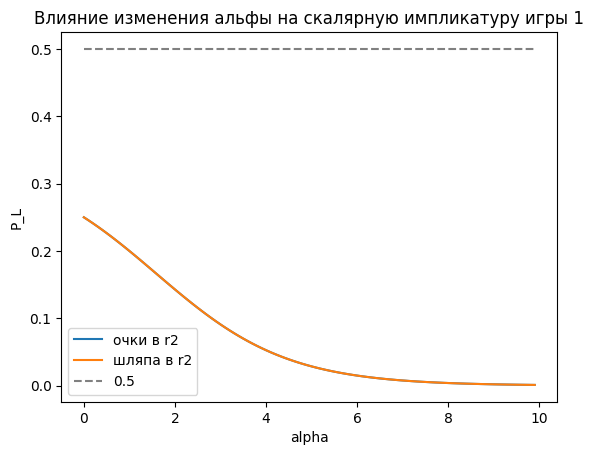

In [163]:
plt.plot(alphas_1, glasses_1, label='очки в r2')
plt.plot(alphas_1, hat_1, label='шляпа в r2')
plt.plot(alphas_1, [0.5]* len(alphas_1), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения альфы на скалярную импликатуру игры 1')
plt.xlabel('alpha')
plt.ylabel('P_L')
plt.legend()
plt.show()

Никак не влияет: при любом изменении можно вычислить скалярную импликатуру.

### *Игра №2*

In [164]:
alphas_2, glasses_2, mustache_2 = change_alpha(lex_2, 'усы', 'r1', 'очки', 'r1')

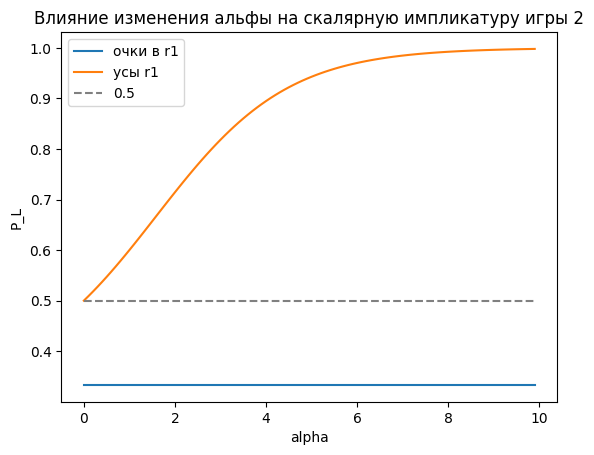

In [165]:
plt.plot(alphas_2, glasses_2, label='очки в r1')
plt.plot(alphas_2, mustache_2, label='усы r1')
plt.plot(alphas_1, [0.5]* len(alphas_2), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения альфы на скалярную импликатуру игры 2')
plt.xlabel('alpha')
plt.ylabel('P_L')
plt.legend()
plt.show()

Влияет только на объект `'очки'`: при α < 1 не вычисляется.

### *Игра №3*

In [166]:
alphas_3, hat_3, mustache_3 = change_alpha(lex_3, 'усы', 'r2', 'шляпа', 'r2')

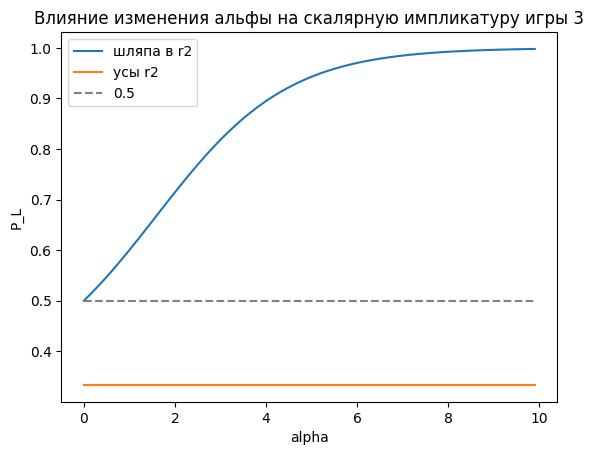

In [167]:
plt.plot(alphas_3, hat_3, label='шляпа в r2')
plt.plot(alphas_3, mustache_3, label='усы r2')
plt.plot(alphas_1, [0.5]* len(alphas_3), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения альфы на скалярную импликатуру игры 3')
plt.xlabel('alpha')
plt.ylabel('P_L')
plt.legend()
plt.show()

Влияет только на объект `'усы'`: при α < 1 не вычисляется.

## **Пробуем менять исходную вероятность выбора**

In [168]:
def change_prior(lx, obj_1, sit_1, obj_2, sit_2, prior_pos):
    prior_1 = []
    obj_1_p = []
    obj_2_p = []
    for p in range(0, 100):
        pr = p / 100
        priors = [0.0, 0.0, 0.0]
        priors[prior_pos - 1] = pr
        prior_poses = list(set([0, 1, 2]) - set([prior_pos - 1]))
        priors[prior_poses[0]] = (1 - pr) / 2
        priors[prior_poses[1]] = (1 - pr) / 2
        basic_mod = RSA(lexicon=lx, prior=priors, costs=[0.0, 0.0, 0.0])
        obj_1_sit_1 = basic_mod.listener().loc[obj_1][sit_1]
        obj_2_sit_2 = basic_mod.listener().loc[obj_2][sit_2]
        prior_1.append(pr)
        obj_1_p.append(obj_1_sit_1)
        obj_2_p.append(obj_2_sit_2)
    return prior_1, obj_1_p, obj_2_p

### *Игра №1*

In [178]:
priors_1, glasses_1, hat_1 = change_prior(lex_1, 'шляпа', 'r2', 'очки', 'r2', 2)

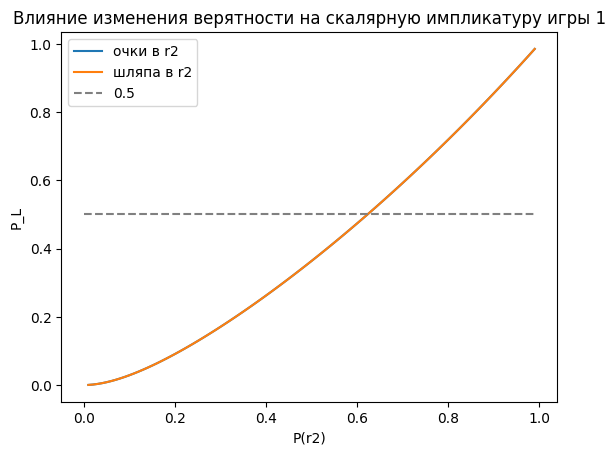

In [179]:
plt.plot(priors_1, glasses_1, label='очки в r2')
plt.plot(priors_1, hat_1, label='шляпа в r2')
plt.plot(priors_1, [0.5] * len(priors_1), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения вероятности на скалярную импликатуру игры 1')
plt.xlabel('P(r2)')
plt.ylabel('P_L')
plt.legend()
plt.show()

Где-то в районе `P(r2) = 0.6` не вычисляется для обеих.

### *Игра №2*

In [180]:
priors_2, glasses_2, mustache_2 = change_prior(lex_2, 'усы', 'r1', 'очки', 'r1', 1)

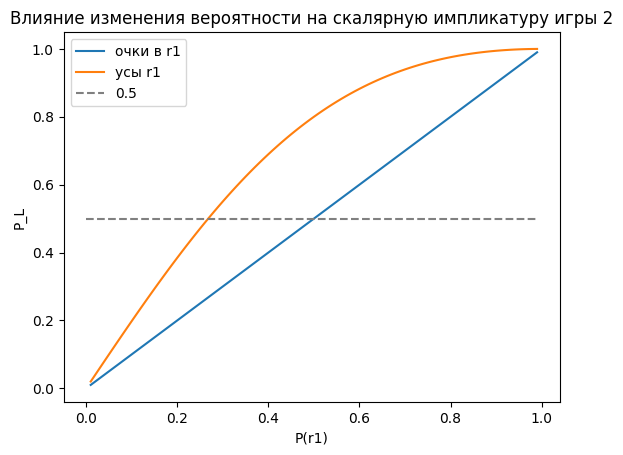

In [181]:
plt.plot(priors_2, glasses_2, label='очки в r1')
plt.plot(priors_2, mustache_2, label='усы r1')
plt.plot(priors_2, [0.5] * len(priors_2), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения вероятности на скалярную импликатуру игры 2')
plt.xlabel('P(r1)')
plt.ylabel('P_L')
plt.legend()
plt.show()

Где-то в районе `P(r1) = 0.3` не вычисляется для усов, а при `P(r2) = 0.5` - для очков.

### *Игра №3*

In [217]:
priors_3, hat_3, mustache_3 = change_prior(lex_3, 'усы', 'r2', 'шляпа', 'r2', 2)

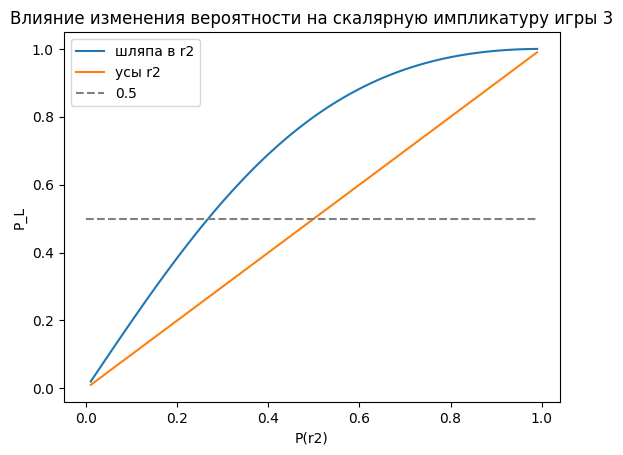

In [218]:
plt.plot(priors_3, hat_3, label='шляпа в r2')
plt.plot(priors_3, mustache_3, label='усы r2')
plt.plot(priors_3, [0.5] * len(priors_3), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения вероятности на скалярную импликатуру игры 3')
plt.xlabel('P(r2)')
plt.ylabel('P_L')
plt.legend()
plt.show()

Где-то в районе `P(r1) = 0.3` не вычисляется для шляпы, а при `P(r2) = 0.5` - для усов.

## **Пробуем менять цену высказывания**

In [200]:
def change_cost(lx, obj_1, sit_1, obj_2, sit_2, cost_pos):
    cost_p = []
    obj_1_p = []
    obj_2_p = []
    for c in range(-100, 100):
        co = c / 10
        cost = [0.0, 0.0, 0.0]
        cost[cost_pos - 1] = co
        basic_mod = RSA(lexicon=lx, prior=[1/3, 1/3, 1/3], costs=cost)
        obj_1_sit_1 = basic_mod.listener().loc[obj_1][sit_1]
        obj_2_sit_2 = basic_mod.listener().loc[obj_2][sit_2]
        cost_p.append(co)
        obj_1_p.append(obj_1_sit_1)
        obj_2_p.append(obj_2_sit_2)
    return cost_p, obj_1_p, obj_2_p

### *Игра №1*

In [219]:
costs_1, glasses_1, hat_1 = change_cost(lex_1, 'шляпа', 'r2', 'очки', 'r2', 1) # для шляпы 

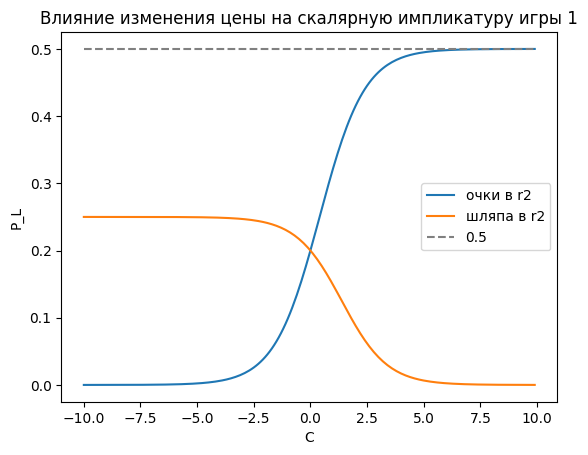

In [220]:
plt.plot(costs_1, glasses_1, label='очки в r2')
plt.plot(costs_1, hat_1, label='шляпа в r2')
plt.plot(costs_1, [0.5] * len(costs_1), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения цены на скалярную импликатуру игры 1')
plt.xlabel('С')
plt.ylabel('P_L')
plt.legend()
plt.show()

Не влияет на вычисляемость усов, а при цене высказывания про шляпу `> 5` не вычисляется про нее.

In [221]:
costs_1, glasses_1, hat_1 = change_cost(lex_1, 'шляпа', 'r2', 'очки', 'r2', 2) # для очков

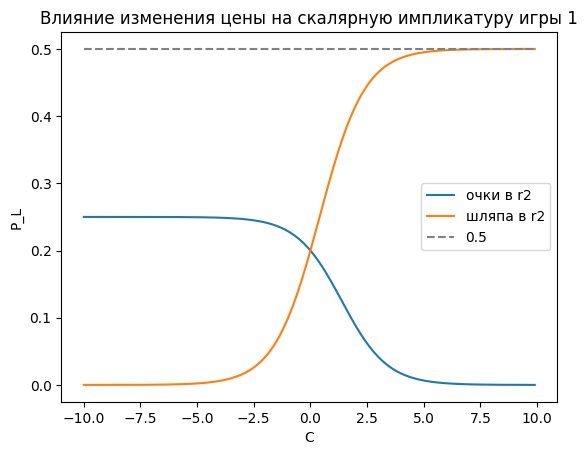

In [222]:
plt.plot(costs_1, glasses_1, label='очки в r2')
plt.plot(costs_1, hat_1, label='шляпа в r2')
plt.plot(costs_1, [0.5] * len(costs_1), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения цены на скалярную импликатуру игры 1')
plt.xlabel('С')
plt.ylabel('P_L')
plt.legend()
plt.show()

Не влияет на вычисляемость очков, а при цене высказывания про очки `> 5` не вычисляется про шляпу.

### *Игра №2*

In [209]:
costs_2, glasses_2, mustache_2 = change_cost(lex_2, 'усы', 'r1', 'очки', 'r1', 2) # для очков

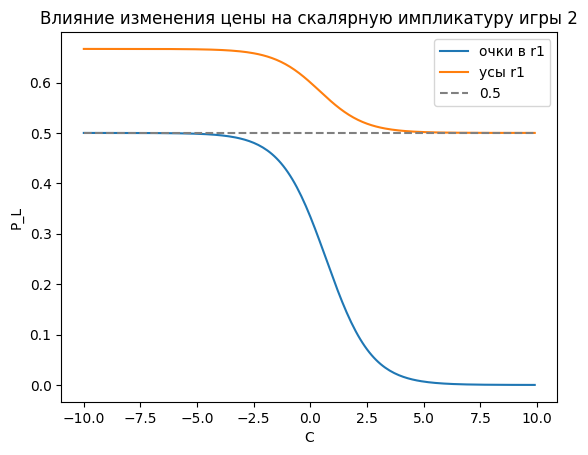

In [210]:
plt.plot(costs_2, glasses_2, label='очки в r1')
plt.plot(costs_2, mustache_2, label='усы r1')
plt.plot(costs_2, [0.5] * len(costs_2), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения цены на скалярную импликатуру игры 2')
plt.xlabel('С')
plt.ylabel('P_L')
plt.legend()
plt.show()

При цене высказывания про очки `> 5` не вычисляется про усы, при цене `< -3` - для очков.

In [211]:
costs_2, glasses_2, mustache_2 = change_cost(lex_2, 'усы', 'r1', 'очки', 'r1', 3) # для усов

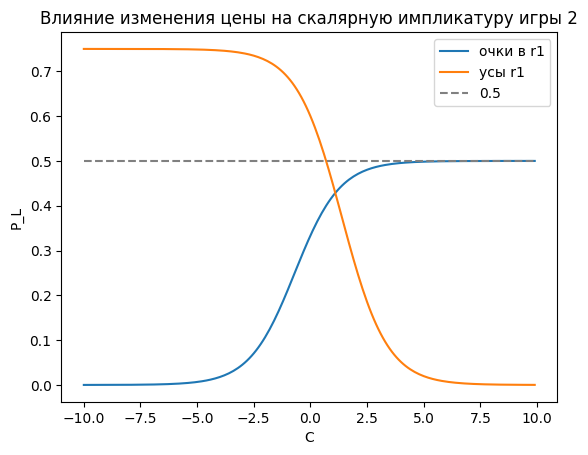

In [212]:
plt.plot(costs_2, glasses_2, label='очки в r1')
plt.plot(costs_2, mustache_2, label='усы r1')
plt.plot(costs_2, [0.5] * len(costs_2), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения цены на скалярную импликатуру игры 2')
plt.xlabel('С')
plt.ylabel('P_L')
plt.legend()
plt.show()

При цене высказывания про усы `= 0` не вычисляется про них. При цене высказывания про усы `> 5` не вычисляется про очки. 

### *Игра №3*

In [213]:
costs_3, hat_3, mustache_3 = change_cost(lex_3, 'усы', 'r2', 'шляпа', 'r2', 1) # для шляпы

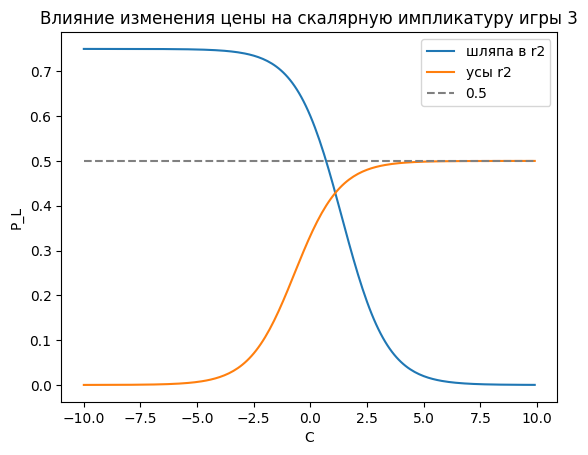

In [214]:
plt.plot(costs_3, hat_3, label='шляпа в r2')
plt.plot(costs_3, mustache_3, label='усы r2')
plt.plot(costs_3, [0.5] * len(costs_3), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения цены на скалярную импликатуру игры 3')
plt.xlabel('С')
plt.ylabel('P_L')
plt.legend()
plt.show()

При цене высказывания про шляпу `= 0` не вычисляется про нее. При цене высказывания про шляпу `> 5` не вычисляется про усы. 

In [215]:
costs_3, hat_3, mustache_3 = change_cost(lex_3, 'усы', 'r2', 'шляпа', 'r2', 3) # для усов

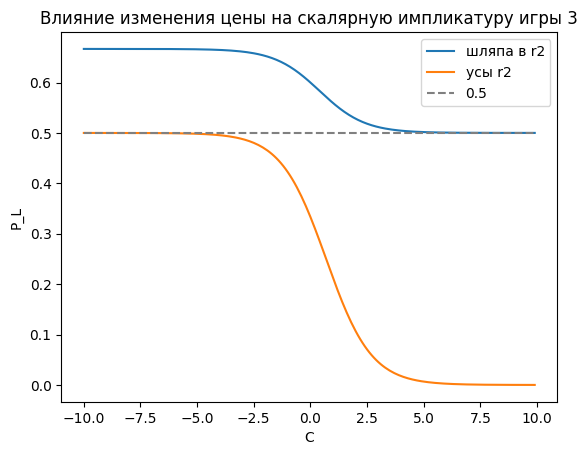

In [216]:
plt.plot(costs_3, hat_3, label='шляпа в r2')
plt.plot(costs_3, mustache_3, label='усы r2')
plt.plot(costs_3, [0.5] * len(costs_3), label='0.5', linestyle='dashed', c='gray')
plt.title('Влияние изменения цены на скалярную импликатуру игры 3')
plt.xlabel('С')
plt.ylabel('P_L')
plt.legend()
plt.show()

При цене высказывания про усы `> 5` не вычисляется про шляпу, при цене `< -3` - для усов.

4. *\[2 бонусных балла\]*

Предложите вариант применения теории рационального речевого акта к лингвистическому феномену, который не обсуждался нами на занятиях. Поясните, почему Вы считаете, что теория рационального речевого акта позволит взглянуть на этот феномен с интересной точки зрения; нужно ли будет модифицировать формулы, как и почему; какую роль в формулах будут играть параметры (цена высказывания, исходная вероятность, оптимальность альфа или какие-то другие параметры, предложенные Вами).

В развернутом виде ответ в этом пункте может стать Вашим эссе.

Я нашла прикольную статью про то, как используется RSA для детекции эмоций и генерации правильного с эмпатической точки зрения ответа [[Kim et al. 2021]](https://arxiv.org/pdf/2109.08828). Мне кажется это применение очень интересным.

В этой статье подробно обсуждается тот факт, что некоторые сгенерированные компьютером ответы на эмоциональные сообщения могут, задеть пользователя и показаться недостаточно эмпатичными (например, слишком общими как *“Are you OK?”*). Поэтому языковая модель должна уловить по входящему сообщению не только нужную эмоцию юзера, но и ее причину, а также сгенерировать эмоционально верный ответ. Например, по предложению *“I got a gift from a friend last vacation!”* модель должна определить эмоцию (`Joyful`), ключевые слова (*friend* и *gift*), а также дать ответ, скорректированный на эмоцию и сфокусированный на ключевых словах, например,  *“Wow, what was the gift?”* или *“Your friend must really like you.”*.

Задача RSA заключается в том, чтобы оценить "безопасность" ответа, но при этом авторы "докручивают" модель, чтобы она могла концентрироваться на ключевых словах и делать ответ более специфичным для ситуации. Для распознания эмоции используется Generative Emotion Estimator (GEE). Он возвращает ключевые слова, описывающие причины эмоции в контексте и генерирует контексты-дистракторы, в которых структура такая же, но эмоции антонимичны (например, `Joyful` → `Sad`). Так, например, дистрактором предложения *“I was `sick` from the `flu`”* может стать *“I was `laughing` from the `relief`”*. Подобные дистракторы вместе с оригинальным контекстом подаются в модель прагматического говорящего и помогают ей сфокусироваться на изначальной эмоции и ее причинах, чтобы породить эмпатичный ответ.
